In [4]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as pp
import datetime as dt
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

## Read CSV File

In [5]:
df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/GoalEarn/Prj-8/GitHub/online_retail_cleaningdata.csv')

In [6]:
df.head()

,Unnamed: 0,invoice_id,item_id,description,quantity,date,unit_price,sales,customer_id,country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,22.00,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390294 entries, 0 to 390293
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   390294 non-null  int64  
 1   invoice_id   390294 non-null  int64  
 2   item_id      390294 non-null  object 
 3   description  390294 non-null  object 
 4   quantity     390294 non-null  int64  
 5   date         390294 non-null  object 
 6   unit_price   390294 non-null  float64
 7   sales        390294 non-null  float64
 8   customer_id  390294 non-null  float64
 9   country      390294 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 29.8+ MB


In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390294 entries, 0 to 390293
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Unnamed: 0   390294 non-null  int64         
 1   invoice_id   390294 non-null  int64         
 2   item_id      390294 non-null  object        
 3   description  390294 non-null  object        
 4   quantity     390294 non-null  int64         
 5   date         390294 non-null  datetime64[ns]
 6   unit_price   390294 non-null  float64       
 7   sales        390294 non-null  float64       
 8   customer_id  390294 non-null  float64       
 9   country      390294 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 29.8+ MB


In [10]:
last_date = df['date'].max()
last_date

Timestamp('2011-12-09 12:50:00')

In [11]:
first_date = df['date'].min()
first_date

Timestamp('2010-12-01 08:26:00')

In [12]:
three_months_ago = last_date - pd.DateOffset(months=3)
three_months_ago

Timestamp('2011-09-09 12:50:00')

In [13]:
df_last_3month = df[df['date'] >= three_months_ago]
df_last_3month

,Unnamed: 0,invoice_id,item_id,description,quantity,date,unit_price,sales,customer_id,country
230910,333176,566186,16045,POPART WOODEN PENCILS ASST,100,2011-09-09 13:02:00,0.04,4.00,16603.0,United Kingdom
230911,333177,566186,21945,STRAWBERRIES DESIGN FLANNEL,12,2011-09-09 13:02:00,0.85,10.20,16603.0,United Kingdom
230912,333178,566186,21641,ASSORTED TUTTI FRUTTI KEYRING BALL,24,2011-09-09 13:02:00,0.29,6.96,16603.0,United Kingdom
230913,333179,566186,22757,LARGE RED BABUSHKA NOTEBOOK,12,2011-09-09 13:02:00,1.25,15.00,16603.0,United Kingdom
230914,333180,566186,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-09-09 13:02:00,0.65,10.40,16603.0,United Kingdom
...,...,...,...,...,...,...,...,...,...,...
390289,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,10.20,12680.0,France
390290,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12.60,12680.0,France
390291,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,16.60,12680.0,France
390292,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,16.60,12680.0,France


In [14]:
rfm_last_3month = (df_last_3month.groupby('customer_id').agg(
                                        recency = ('date' , lambda x: (last_date - x.max()).days),
                                        frequency = ('invoice_id' , 'nunique'),
                                        monetary = ('sales' , 'sum')).reset_index())

In [15]:
rfm_last_3month

,customer_id,recency,frequency,monetary
0,12347.0,1,2,1519.14
1,12348.0,74,1,270.00
2,12349.0,18,1,1353.80
3,12352.0,35,3,744.23
4,12356.0,22,1,58.35
...,...,...,...,...
2859,18277.0,57,1,110.38
2860,18278.0,73,1,173.90
2861,18282.0,7,1,77.84
2862,18283.0,3,6,958.26


## **CLV = AOV * Purchase Frequency * Customer Lifespan**


**AOV (Average Order Value)**


In [17]:
rfm_last_3month['aov'] = (rfm_last_3month['monetary'] / rfm_last_3month['frequency']).clip(lower=1)
rfm_last_3month

,customer_id,recency,frequency,monetary,aov
0,12347.0,1,2,1519.14,759.570000
1,12348.0,74,1,270.00,270.000000
2,12349.0,18,1,1353.80,1353.800000
3,12352.0,35,3,744.23,248.076667
4,12356.0,22,1,58.35,58.350000
...,...,...,...,...,...
2859,18277.0,57,1,110.38,110.380000
2860,18278.0,73,1,173.90,173.900000
2861,18282.0,7,1,77.84,77.840000
2862,18283.0,3,6,958.26,159.710000


In [18]:
rfm_last_3month['purchase_freq'] = rfm_last_3month['frequency']
rfm_last_3month

,customer_id,recency,frequency,monetary,aov,purchase_freq
0,12347.0,1,2,1519.14,759.570000,2
1,12348.0,74,1,270.00,270.000000,1
2,12349.0,18,1,1353.80,1353.800000,1
3,12352.0,35,3,744.23,248.076667,3
4,12356.0,22,1,58.35,58.350000,1
...,...,...,...,...,...,...
2859,18277.0,57,1,110.38,110.380000,1
2860,18278.0,73,1,173.90,173.900000,1
2861,18282.0,7,1,77.84,77.840000,1
2862,18283.0,3,6,958.26,159.710000,6


In [ ]:
n per

**Lifespan per Months**

In [19]:
rfm_last_3month['lifespn_per_month'] = (rfm_last_3month['recency'] / 30).clip(lower=1)
rfm_last_3month

,customer_id,recency,frequency,monetary,aov,purchase_freq,lifespn_per_month
0,12347.0,1,2,1519.14,759.570000,2,1.000000
1,12348.0,74,1,270.00,270.000000,1,2.466667
2,12349.0,18,1,1353.80,1353.800000,1,1.000000
3,12352.0,35,3,744.23,248.076667,3,1.166667
4,12356.0,22,1,58.35,58.350000,1,1.000000
...,...,...,...,...,...,...,...
2859,18277.0,57,1,110.38,110.380000,1,1.900000
2860,18278.0,73,1,173.90,173.900000,1,2.433333
2861,18282.0,7,1,77.84,77.840000,1,1.000000
2862,18283.0,3,6,958.26,159.710000,6,1.000000


**Lifespan = The Mean of All Recencies**

In [20]:
avg_recency = rfm_last_3month['recency'].mean()

In [21]:
avg_lifespn = avg_recency / 30

In [22]:
rfm_last_3month['lifespn_avg'] = avg_lifespn
rfm_last_3month

,customer_id,recency,frequency,monetary,aov,purchase_freq,lifespn_per_month,lifespn_avg
0,12347.0,1,2,1519.14,759.570000,2,1.000000,1.030622
1,12348.0,74,1,270.00,270.000000,1,2.466667,1.030622
2,12349.0,18,1,1353.80,1353.800000,1,1.000000,1.030622
3,12352.0,35,3,744.23,248.076667,3,1.166667,1.030622
4,12356.0,22,1,58.35,58.350000,1,1.000000,1.030622
...,...,...,...,...,...,...,...,...
2859,18277.0,57,1,110.38,110.380000,1,1.900000,1.030622
2860,18278.0,73,1,173.90,173.900000,1,2.433333,1.030622
2861,18282.0,7,1,77.84,77.840000,1,1.000000,1.030622
2862,18283.0,3,6,958.26,159.710000,6,1.000000,1.030622


In [23]:
rfm_last_3month['clv_lifesp_m'] = (
                            rfm_last_3month['aov'] *
                            rfm_last_3month['purchase_freq']*
                            rfm_last_3month['lifespn_per_month']
)

In [24]:
rfm_last_3month['clv_lifesp_avg'] = (
                            rfm_last_3month['aov'] *
                            rfm_last_3month['purchase_freq']*
                            rfm_last_3month['lifespn_avg']
)

In [25]:
rfm_last_3month

,customer_id,recency,frequency,monetary,aov,purchase_freq,lifespn_per_month,lifespn_avg,clv_lifesp_m,clv_lifesp_avg
0,12347.0,1,2,1519.14,759.570000,2,1.000000,1.030622,1519.140000,1565.658358
1,12348.0,74,1,270.00,270.000000,1,2.466667,1.030622,666.000000,278.267807
2,12349.0,18,1,1353.80,1353.800000,1,1.000000,1.030622,1353.800000,1395.255398
3,12352.0,35,3,744.23,248.076667,3,1.166667,1.030622,868.268333,767.019445
4,12356.0,22,1,58.35,58.350000,1,1.000000,1.030622,58.350000,60.136765
...,...,...,...,...,...,...,...,...,...,...
2859,18277.0,57,1,110.38,110.380000,1,1.900000,1.030622,209.722000,113.760002
2860,18278.0,73,1,173.90,173.900000,1,2.433333,1.030622,423.156667,179.225080
2861,18282.0,7,1,77.84,77.840000,1,1.000000,1.030622,77.840000,80.223578
2862,18283.0,3,6,958.26,159.710000,6,1.000000,1.030622,958.260000,987.603367


In [57]:
rfm_last_3month.to_csv('/content/drive/MyDrive/ColabNotebooks/GoalEarn/Prj-8/GitHub/rfm_clv_3month_RealData.csv')

In [59]:
rfm_last_3month.to_excel('/content/drive/MyDrive/ColabNotebooks/GoalEarn/Prj-8/GitHub/rfm_clv_3month_RealData.xlsx')

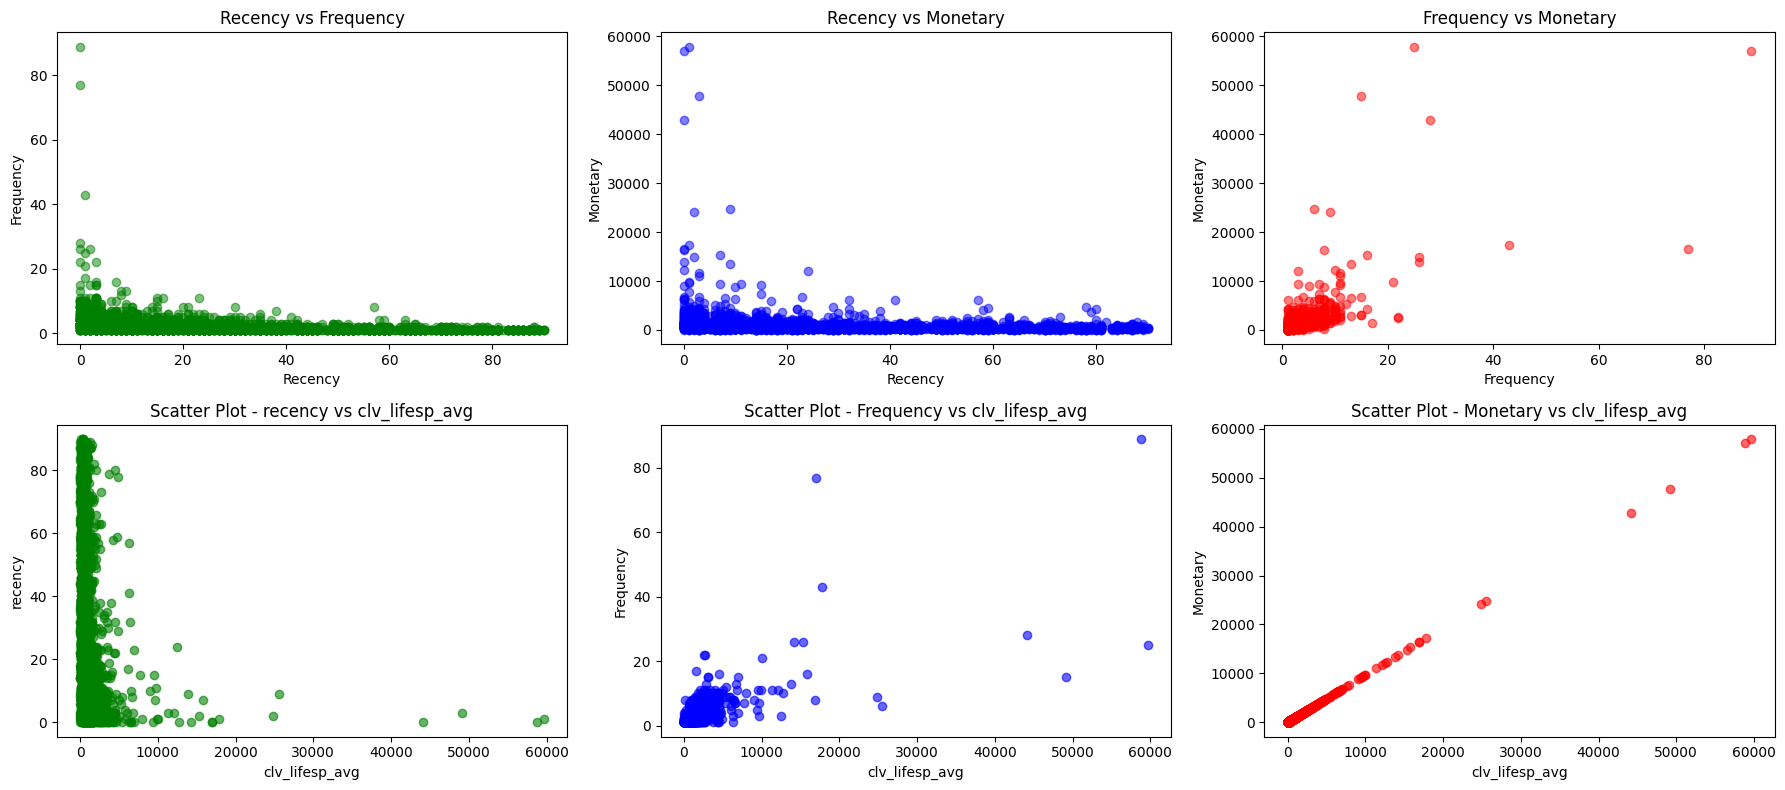

In [28]:
plt.figure(figsize=(18,8))

# Recency vs Frequency
plt.subplot(2, 3, 1)
plt.scatter(rfm_last_3month['recency'], rfm_last_3month['frequency'], color='green', alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs Frequency')

# Recency vs Monetary
plt.subplot(2, 3, 2)
plt.scatter(rfm_last_3month['recency'], rfm_last_3month['monetary'], color='blue', alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Recency vs Monetary')

# Frequency vs Monetary
plt.subplot(2, 3, 3)
plt.scatter(rfm_last_3month['frequency'], rfm_last_3month['monetary'], color='red', alpha=0.5)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Frequency vs Monetary')

# recency vs clv_lifesp_avg
plt.subplot(2, 3, 4)
plt.scatter(rfm_last_3month['clv_lifesp_avg'], rfm_last_3month['recency'], color='green', alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('recency')
plt.title('Scatter Plot - recency vs clv_lifesp_avg')

# Frequency vs clv_lifesp_avg
plt.subplot(2, 3, 5)
plt.scatter(rfm_last_3month['clv_lifesp_avg'], rfm_last_3month['frequency'], color='blue', alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('Frequency')
plt.title('Scatter Plot - Frequency vs clv_lifesp_avg')

# Frequency vs clv_lifesp_avg
plt.subplot(2, 3, 6)
plt.scatter(rfm_last_3month['clv_lifesp_avg'], rfm_last_3month['monetary'], color='red', alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('Monetary')
plt.title('Scatter Plot - Monetary vs clv_lifesp_avg')



plt.tight_layout()
plt.show()


## Normalization,Standardization

In [29]:
relevant_cols = ['recency' , 'frequency' , 'monetary' , 'clv_lifesp_m' , 'clv_lifesp_avg']

In [30]:
rfm_clv = rfm_last_3month[relevant_cols]
rfm_clv.head()

,recency,frequency,monetary,clv_lifesp_m,clv_lifesp_avg
0,1,2,1519.14,1519.140000,1565.658358
1,74,1,270.00,666.000000,278.267807
2,18,1,1353.80,1353.800000,1395.255398
3,35,3,744.23,868.268333,767.019445
4,22,1,58.35,58.350000,60.136765


### MinMax Normalization

In [31]:
scaler1 = pp.MinMaxScaler()
minmax_sclr = scaler1.fit_transform(rfm_clv)

In [32]:
minmax_sclr

array([[0.01111111, 0.01136364, 0.02623749, 0.02619658, 0.02622069],
       [0.82222222, 0.        , 0.00466323, 0.01146113, 0.00464606],
       [0.2       , 0.        , 0.02338185, 0.02334082, 0.023365  ],
       ...,
       [0.07777778, 0.        , 0.00134438, 0.00130243, 0.00132715],
       [0.03333333, 0.05681818, 0.01655037, 0.01650905, 0.0165334 ],
       [0.46666667, 0.01136364, 0.0185148 , 0.02587981, 0.01849787]])

In [33]:
# Array to DataFrame

minmax_df = pd.DataFrame(minmax_sclr, columns=relevant_cols)
minmax_df.head()

,recency,frequency,monetary,clv_lifesp_m,clv_lifesp_avg
0,0.011111,0.011364,0.026237,0.026197,0.026221
1,0.822222,0.000000,0.004663,0.011461,0.004646
2,0.200000,0.000000,0.023382,0.023341,0.023365
3,0.388889,0.022727,0.012854,0.014955,0.012837
4,0.244444,0.000000,0.001008,0.000966,0.000991


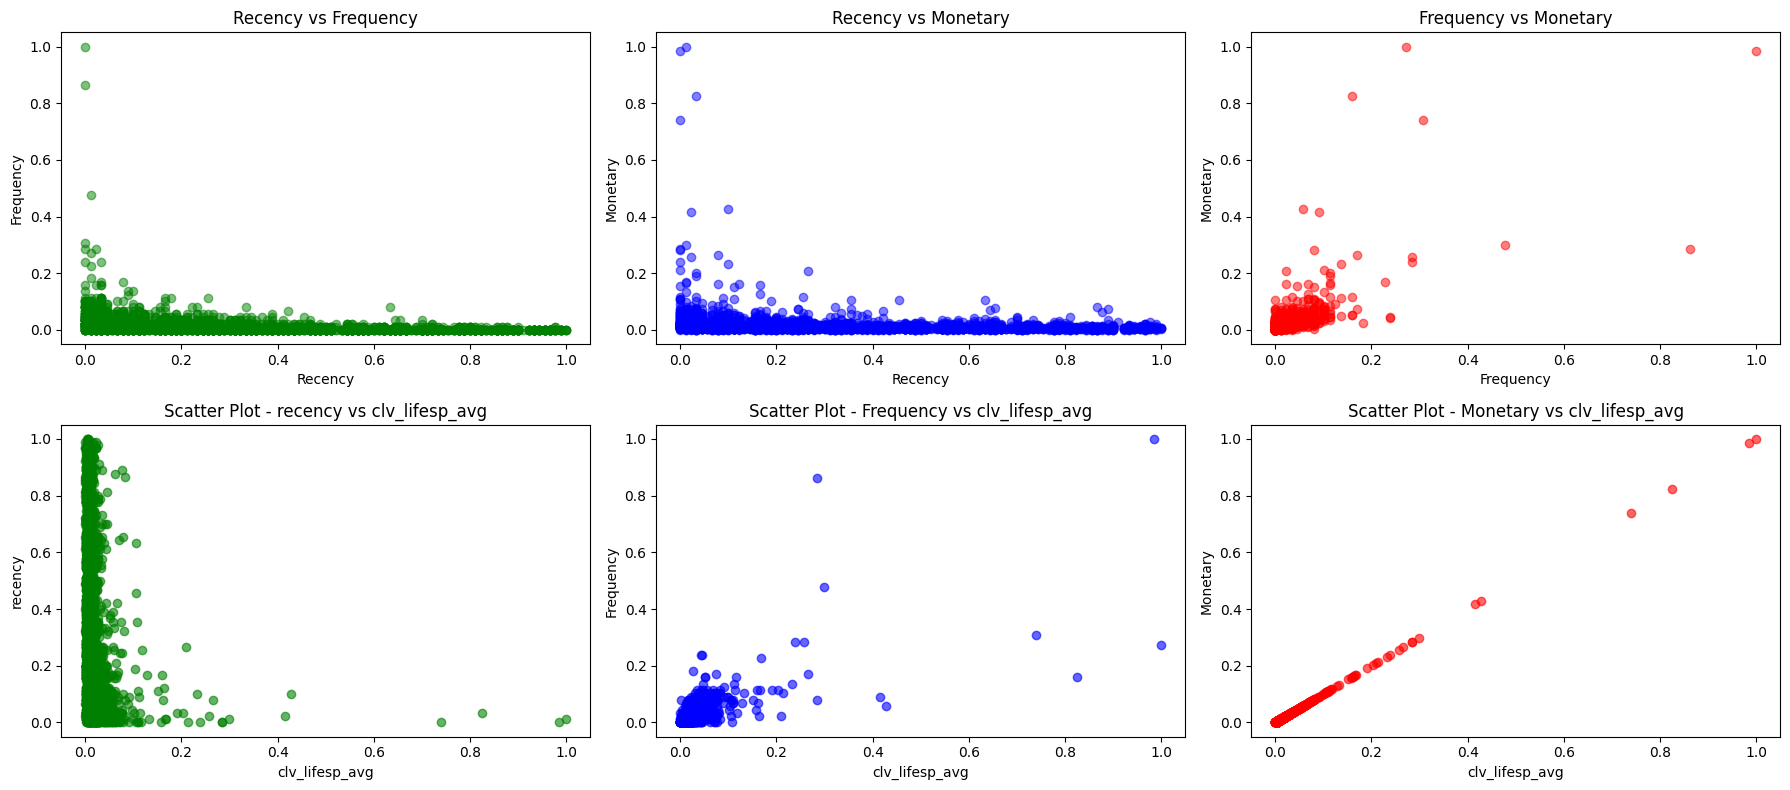

In [34]:
plt.figure(figsize=(18,8))

# Recency vs Frequency
plt.subplot(2, 3, 1)
plt.scatter(minmax_df['recency'], minmax_df['frequency'], color='green', alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs Frequency')

# Recency vs Monetary
plt.subplot(2, 3, 2)
plt.scatter(minmax_df['recency'], minmax_df['monetary'], color='blue', alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Recency vs Monetary')

# Frequency vs Monetary
plt.subplot(2, 3, 3)
plt.scatter(minmax_df['frequency'], minmax_df['monetary'], color='red', alpha=0.5)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Frequency vs Monetary')

# recency vs clv_lifesp_avg
plt.subplot(2, 3, 4)
plt.scatter(minmax_df['clv_lifesp_avg'], minmax_df['recency'], color='green', alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('recency')
plt.title('Scatter Plot - recency vs clv_lifesp_avg')

# Frequency vs clv_lifesp_avg
plt.subplot(2, 3, 5)
plt.scatter(minmax_df['clv_lifesp_avg'], minmax_df['frequency'], color='blue', alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('Frequency')
plt.title('Scatter Plot - Frequency vs clv_lifesp_avg')

# Frequency vs clv_lifesp_avg
plt.subplot(2, 3, 6)
plt.scatter(minmax_df['clv_lifesp_avg'], minmax_df['monetary'], color='red', alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('Monetary')
plt.title('Scatter Plot - Monetary vs clv_lifesp_avg')



plt.tight_layout()
plt.show()


### Standard Normalization

In [35]:
scaler2 = pp.StandardScaler()
std_sclr = scaler2.fit_transform(rfm_clv)

In [36]:
std_sclr

array([[-1.20713065, -0.08356675,  0.24929824,  0.17254699,  0.24929811],
       [ 1.73820784, -0.4018316 , -0.27588955, -0.17853509, -0.27588971],
       [-0.52122991, -0.4018316 ,  0.17978278,  0.10450668,  0.17978264],
       ...,
       [-0.96504804, -0.4018316 , -0.35668121, -0.42057326, -0.35668137],
       [-1.12643645,  1.18949265,  0.01348214, -0.05826497,  0.01348199],
       [ 0.44710056, -0.08356675,  0.06130292,  0.16499976,  0.06130278]])

In [37]:
# Array to DataFrame

std_df = pd.DataFrame(std_sclr , columns=relevant_cols)
std_df.head()

,recency,frequency,monetary,clv_lifesp_m,clv_lifesp_avg
0,-1.207131,-0.083567,0.249298,0.172547,0.249298
1,1.738208,-0.401832,-0.275890,-0.178535,-0.275890
2,-0.521230,-0.401832,0.179783,0.104507,0.179783
3,0.164671,0.234698,-0.076505,-0.095298,-0.076505
4,-0.359841,-0.401832,-0.364876,-0.428594,-0.364876


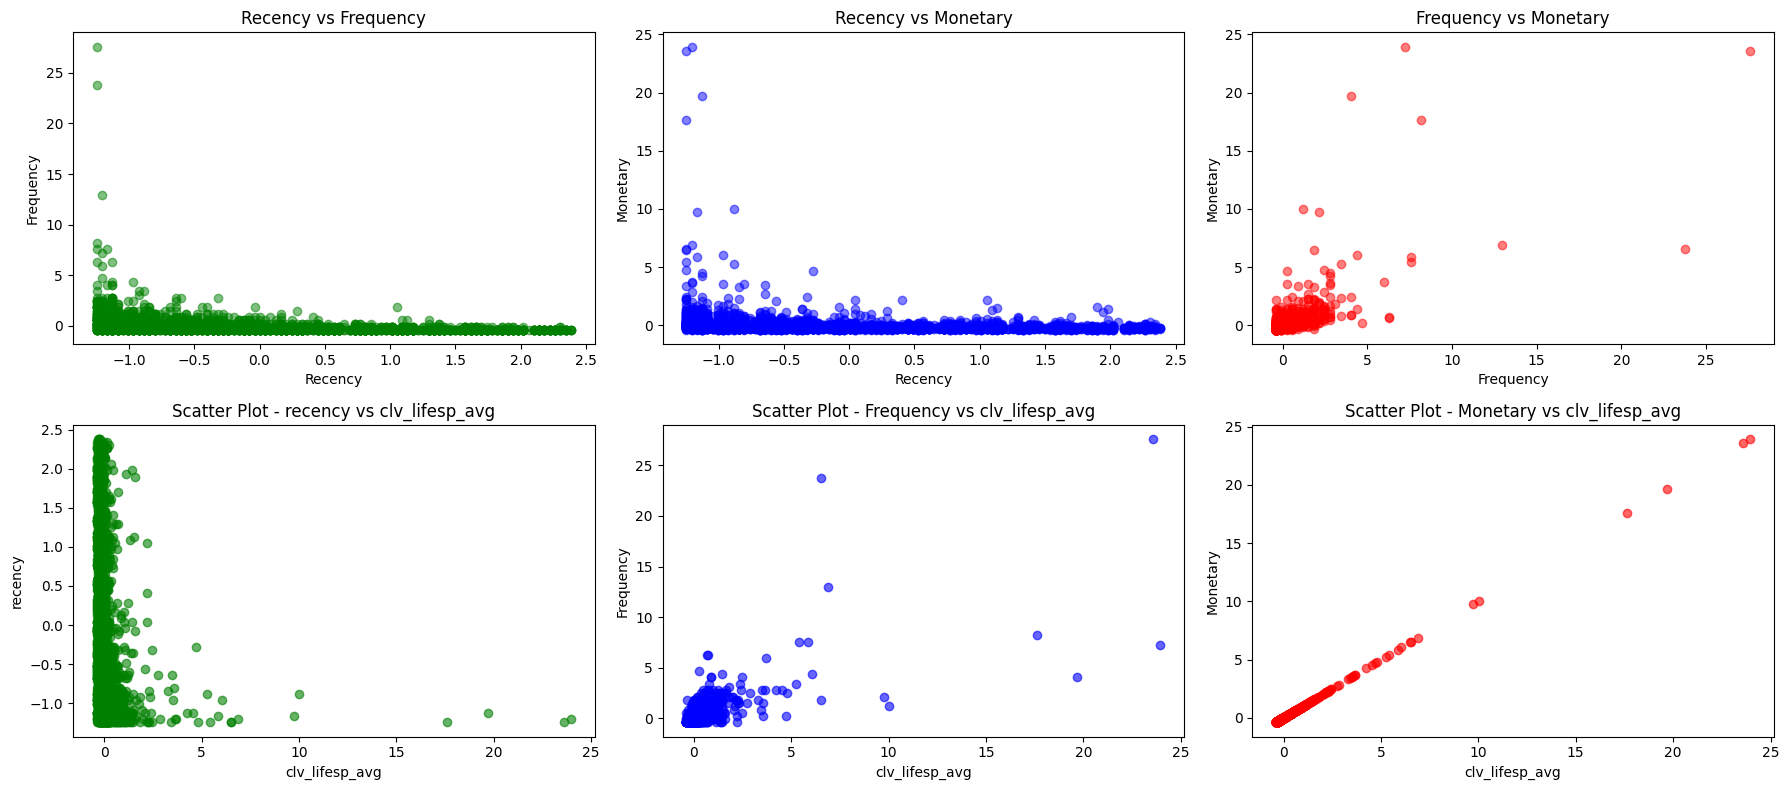

In [38]:
plt.figure(figsize=(18,8))

# Recency vs Frequency
plt.subplot(2, 3, 1)
plt.scatter(std_df['recency'], std_df['frequency'], color='green', alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs Frequency')

# Recency vs Monetary
plt.subplot(2, 3, 2)
plt.scatter(std_df['recency'], std_df['monetary'], color='blue', alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Recency vs Monetary')

# Frequency vs Monetary
plt.subplot(2, 3, 3)
plt.scatter(std_df['frequency'], std_df['monetary'], color='red', alpha=0.5)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Frequency vs Monetary')

# recency vs clv_lifesp_avg
plt.subplot(2, 3, 4)
plt.scatter(std_df['clv_lifesp_avg'], std_df['recency'], color='green', alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('recency')
plt.title('Scatter Plot - recency vs clv_lifesp_avg')

# Frequency vs clv_lifesp_avg
plt.subplot(2, 3, 5)
plt.scatter(std_df['clv_lifesp_avg'], std_df['frequency'], color='blue', alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('Frequency')
plt.title('Scatter Plot - Frequency vs clv_lifesp_avg')

# Frequency vs clv_lifesp_avg
plt.subplot(2, 3, 6)
plt.scatter(std_df['clv_lifesp_avg'], std_df['monetary'], color='red', alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('Monetary')
plt.title('Scatter Plot - Monetary vs clv_lifesp_avg')



plt.tight_layout()
plt.show()



### Robust Normalization

In [39]:
scaler3 = pp.RobustScaler()
robust_sclr = scaler3.fit_transform(rfm_clv)

In [40]:
robust_sclr

array([[-0.575     ,  0.5       ,  1.45685191,  1.01714984,  1.45685191],
       [ 1.25      ,  0.        , -0.28685595,  0.02694867, -0.28685595],
       [-0.15      ,  0.        ,  1.22604939,  0.82524715,  1.22604939],
       ...,
       [-0.425     ,  0.        , -0.55509723, -0.65570215, -0.55509723],
       [-0.525     ,  2.5       ,  0.67390455,  0.36616169,  0.67390455],
       [ 0.45      ,  0.5       ,  0.83267725,  0.99586343,  0.83267725]])

In [41]:
# Array to DataFrame

robust_df = pd.DataFrame(robust_sclr , columns=relevant_cols)
robust_df.head()

,recency,frequency,monetary,clv_lifesp_m,clv_lifesp_avg
0,-0.575,0.5,1.456852,1.017150,1.456852
1,1.250,0.0,-0.286856,0.026949,-0.286856
2,-0.150,0.0,1.226049,0.825247,1.226049
3,0.275,1.0,0.375134,0.261712,0.375134
4,-0.050,0.0,-0.582304,-0.678323,-0.582304


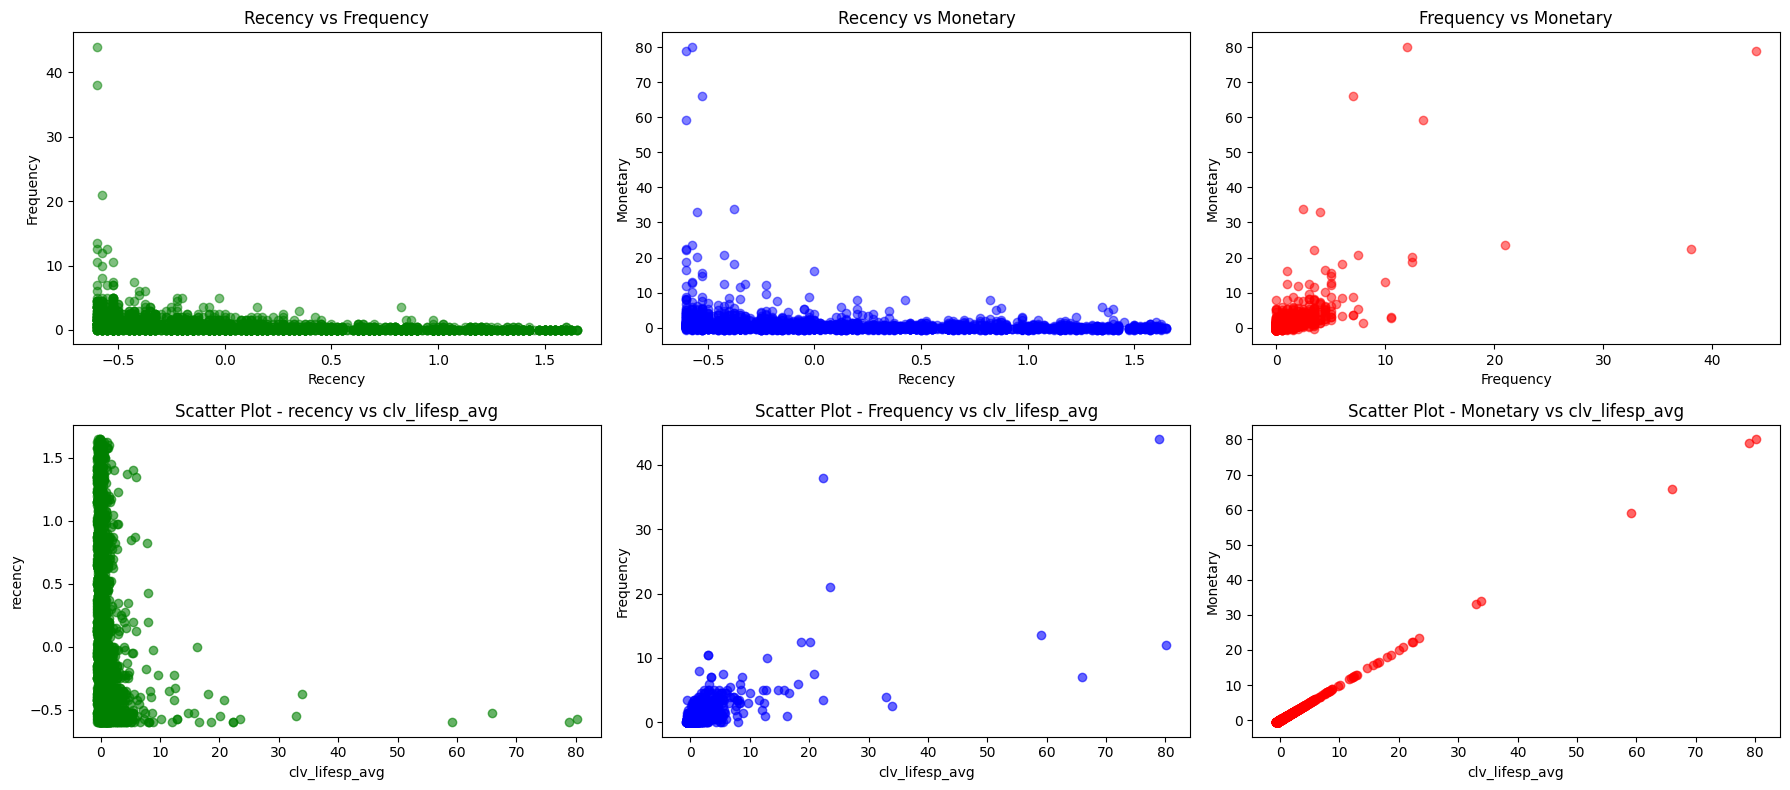

In [42]:
plt.figure(figsize=(18,8))

# Recency vs Frequency
plt.subplot(2, 3, 1)
plt.scatter(robust_df['recency'], robust_df['frequency'], color='green', alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs Frequency')

# Recency vs Monetary
plt.subplot(2, 3, 2)
plt.scatter(robust_df['recency'], robust_df['monetary'], color='blue', alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Recency vs Monetary')

# Frequency vs Monetary
plt.subplot(2, 3, 3)
plt.scatter(robust_df['frequency'], robust_df['monetary'], color='red', alpha=0.5)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Frequency vs Monetary')

# recency vs clv_lifesp_avg
plt.subplot(2, 3, 4)
plt.scatter(robust_df['clv_lifesp_avg'], robust_df['recency'], color='green', alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('recency')
plt.title('Scatter Plot - recency vs clv_lifesp_avg')

# Frequency vs clv_lifesp_avg
plt.subplot(2, 3, 5)
plt.scatter(robust_df['clv_lifesp_avg'], robust_df['frequency'], color='blue', alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('Frequency')
plt.title('Scatter Plot - Frequency vs clv_lifesp_avg')

# Frequency vs clv_lifesp_avg
plt.subplot(2, 3, 6)
plt.scatter(robust_df['clv_lifesp_avg'], robust_df['monetary'], color='red', alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('Monetary')
plt.title('Scatter Plot - Monetary vs clv_lifesp_avg')



plt.tight_layout()
plt.show()



## Clustering - KMeans - ElbowPlot

In [43]:
def find_best_clusters(df, maximum_K):

    clusters_centers = []
    k_values = []

    for k in range(1, maximum_K):

        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)


    return clusters_centers, k_values


In [44]:
def generate_elbow_plot(clusters_centers, k_values):

    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()


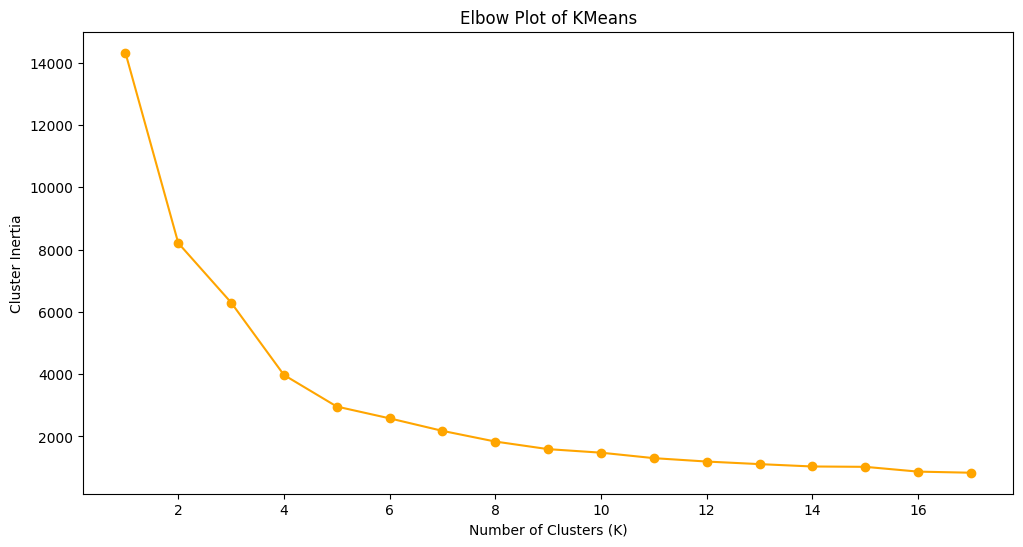

In [45]:
clusters_centers, k_values = find_best_clusters(std_sclr, 18)

generate_elbow_plot(clusters_centers, k_values)


In [46]:
kmeans_model = KMeans(n_clusters = 5)
kmeans_model.fit(std_sclr)

KMeans(n_clusters=5)

In [47]:
std_df["clusters"] = kmeans_model.labels_
std_df.head()

,recency,frequency,monetary,clv_lifesp_m,clv_lifesp_avg,clusters
0,-1.207131,-0.083567,0.249298,0.172547,0.249298,1
1,1.738208,-0.401832,-0.275890,-0.178535,-0.275890,0
2,-0.521230,-0.401832,0.179783,0.104507,0.179783,1
3,0.164671,0.234698,-0.076505,-0.095298,-0.076505,1
4,-0.359841,-0.401832,-0.364876,-0.428594,-0.364876,1


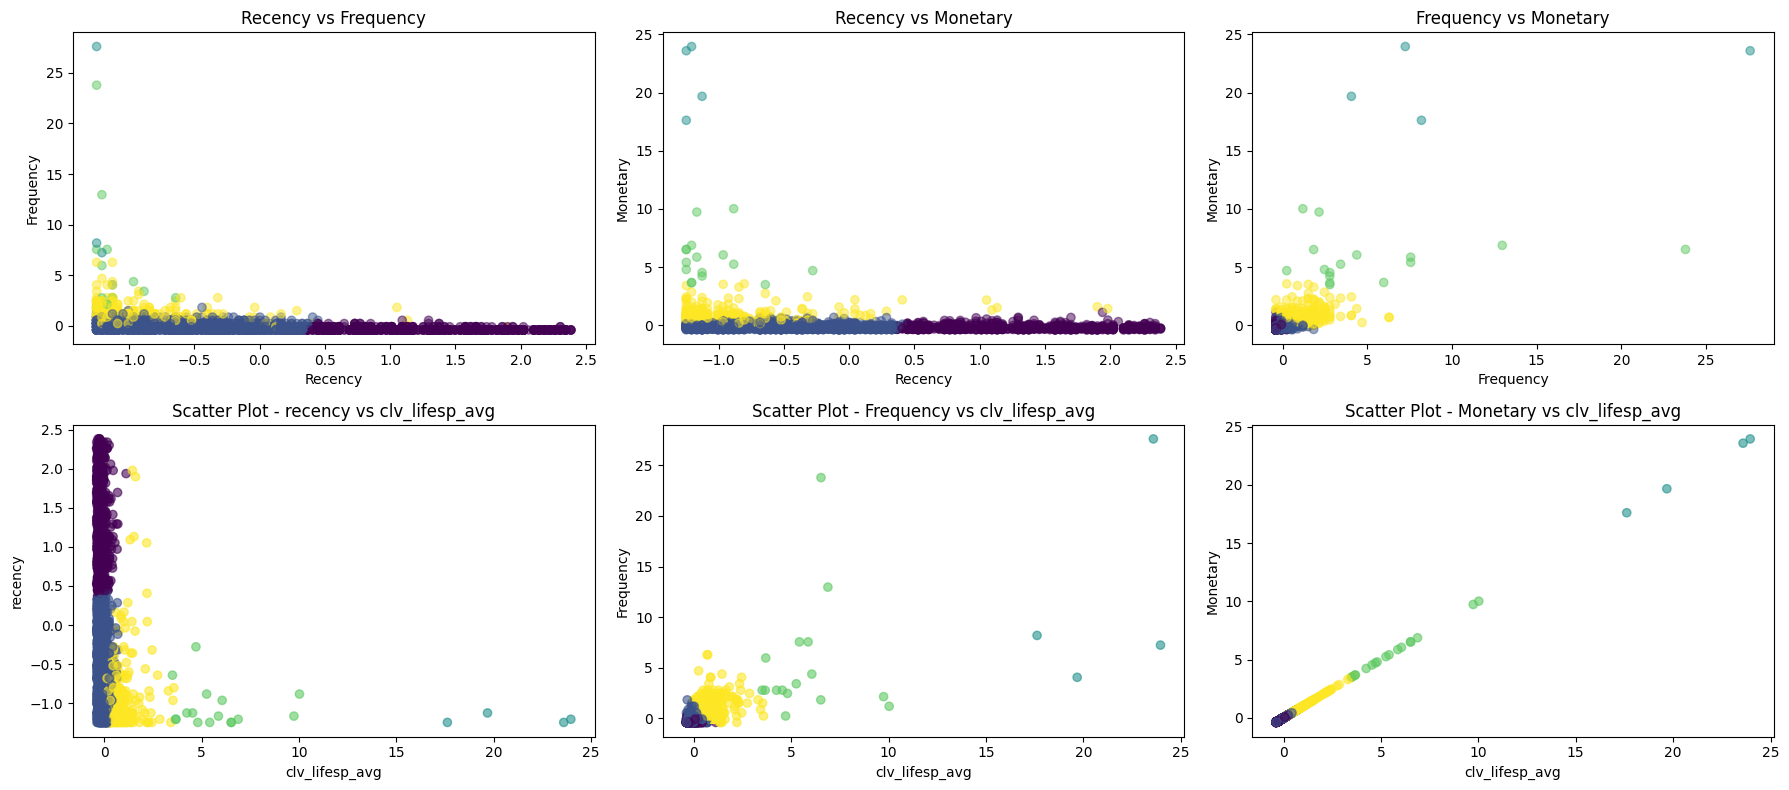

In [48]:
plt.figure(figsize=(18,8))

# Recency vs Frequency
plt.subplot(2, 3, 1)
plt.scatter(std_df['recency'], std_df['frequency'],c = std_df['clusters'] , alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Recency vs Frequency')

# Recency vs Monetary
plt.subplot(2, 3, 2)
plt.scatter(std_df['recency'], std_df['monetary'], c = std_df['clusters'], alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Recency vs Monetary')

# Frequency vs Monetary
plt.subplot(2, 3, 3)
plt.scatter(std_df['frequency'], std_df['monetary'], c = std_df['clusters'], alpha=0.5)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Frequency vs Monetary')

# recency vs clv_lifesp_avg
plt.subplot(2, 3, 4)
plt.scatter(std_df['clv_lifesp_avg'], std_df['recency'], c = std_df['clusters'] , alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('recency')
plt.title('Scatter Plot - recency vs clv_lifesp_avg')

# Frequency vs clv_lifesp_avg
plt.subplot(2, 3, 5)
plt.scatter(std_df['clv_lifesp_avg'], std_df['frequency'], c = std_df['clusters'] , alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('Frequency')
plt.title('Scatter Plot - Frequency vs clv_lifesp_avg')

# Frequency vs clv_lifesp_avg
plt.subplot(2, 3, 6)
plt.scatter(std_df['clv_lifesp_avg'], std_df['monetary'], c = std_df['clusters'] , alpha=0.6)
plt.xlabel('clv_lifesp_avg')
plt.ylabel('Monetary')
plt.title('Scatter Plot - Monetary vs clv_lifesp_avg')



plt.tight_layout()
plt.show()



In [49]:
std_df['customer_id'] = rfm_last_3month['customer_id'].values

In [50]:
std_df.head()

,recency,frequency,monetary,clv_lifesp_m,clv_lifesp_avg,clusters,customer_id
0,-1.207131,-0.083567,0.249298,0.172547,0.249298,1,12347.0
1,1.738208,-0.401832,-0.275890,-0.178535,-0.275890,0,12348.0
2,-0.521230,-0.401832,0.179783,0.104507,0.179783,1,12349.0
3,0.164671,0.234698,-0.076505,-0.095298,-0.076505,1,12352.0
4,-0.359841,-0.401832,-0.364876,-0.428594,-0.364876,1,12356.0


In [51]:
clusters_mean = std_df.groupby('clusters').agg(
                                                avg_recency = ('recency' , 'mean'),
                                                avg_frequency = ('frequency','mean'),
                                                avg_monetary = ('monetary','mean'),
                                                avg_clv_lifesp_m = ('clv_lifesp_m','mean'),
                                                avg_clv_lifesp_avg = ('clv_lifesp_avg','mean'),
                                                customers_count = ('customer_id' , 'count')

).reset_index()

In [52]:
clusters_mean

,clusters,avg_recency,avg_frequency,avg_monetary,avg_clv_lifesp_m,avg_clv_lifesp_avg,customers_count
0,0,1.268952,-0.347741,-0.197492,-0.065906,-0.197491,912
1,1,-0.536397,-0.092770,-0.136994,-0.200044,-0.136994,1660
2,2,-1.207131,11.771799,21.209516,20.687978,21.209517,4
3,3,-1.053307,5.287153,5.714491,5.521765,5.714491,16
4,4,-0.901412,1.247997,0.850194,0.812792,0.850194,272


In [53]:
std_df.to_csv('RFM_CLV&RFM_3Month.csv')

In [54]:
std_df.to_excel('RFM_CLV&RFM_3Month.xlsx')

In [55]:
clusters_mean.to_csv('RFM_CLV&RFM_3Month_mean.csv')

In [56]:
clusters_mean.to_excel('RFM_CLV&RFM_3Month_mean.xlsx')